In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [22]:
font = {'family' : '"Helvetica Neue", Helvetica, Arial, sans-serif',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

In [15]:
respuestas = pd.read_csv('test_usabilidad_raw.csv')
respuestas

,Marca temporal,¿En cuál de las siguientes categorías te sientes más identificado por tu profesión?,¿Con qué género te identificas?,Me ha resultado fácil realizar las tareas propuestas,"Me ha resultado fácil interpretar los elementos gráficos (iconos, botones, gráficas...)","La selección de elementos gráficos usados en la aplicación (colores, tipografías...) me ha parecido acertada",¿Has encontrado algún error que te ha impedido continuar?,"En general, ¿qué valoración le das a la aplicación?",Si no dispone de un teléfono Android marque la siguiente casilla,Me ha resultado fácil realizar las tareas propuestas.1,"Me ha resultado fácil interpretar los elementos gráficos (iconos, botones, gráficas...).1","La selección de elementos gráficos usados en la aplicación (colores, tipografías...) me ha parecido acertada.1",¿Has encontrado algún error que te ha impedido continuar?.1,"En general, ¿qué valoración le das a la aplicación?.1"
0,20/06/2019 11:38:42,Tecnología,Hombre,5,3,3,No,4,NaN,5.0,3.0,3.0,No,4.0
1,20/06/2019 11:47:49,Tecnología,Prefiero no decirlo,4,3,5,No,4,No dispongo de un teléfono Android,4.0,4.0,5.0,No,4.0
2,20/06/2019 12:19:41,Tecnología,Hombre,4,4,5,No,5,NaN,4.0,4.0,5.0,No,5.0
3,20/06/2019 13:26:09,Asistencia sanitaria,Mujer,5,4,4,No,4,NaN,5.0,4.0,4.0,No,4.0
4,20/06/2019 13:39:02,Tecnología,Hombre,5,4,4,No,4,NaN,5.0,4.0,5.0,No,4.0
5,21/06/2019 19:31:03,Educación,Mujer,5,4,5,No,5,NaN,5.0,4.0,5.0,No,5.0
6,22/06/2019 17:53:03,Educación,Hombre,5,5,5,No,5,NaN,NaN,NaN,NaN,NaN,NaN
7,22/06/2019 21:51:10,Asistencia sanitaria,Mujer,4,3,5,No,4,NaN,NaN,NaN,NaN,NaN,NaN
8,23/06/2019 23:45:47,Asistencia sanitaria,Hombre,3,2,3,No,3,NaN,4.0,2.0,3.0,No,3.0
9,24/06/2019 10:36:53,Tecnología,Hombre,5,5,5,No,5,NaN,5.0,5.0,5.0,No,5.0


In [16]:
columns = ['Timestamp','Career','Gender','Web_Ease','Web_Interpretation','Web_graphics','Web_errors','Web_global',
           'Android','Mobile_Ease','Mobile_Interpretation','Mobile_graphics','Mobile_errors','Mobile_global']
respuestas.columns = columns
respuestas.head()

,Timestamp,Career,Gender,Web_Ease,Web_Interpretation,Web_graphics,Web_errors,Web_global,Android,Mobile_Ease,Mobile_Interpretation,Mobile_graphics,Mobile_errors,Mobile_global
0,20/06/2019 11:38:42,Tecnología,Hombre,5,3,3,No,4,NaN,5.0,3.0,3.0,No,4.0
1,20/06/2019 11:47:49,Tecnología,Prefiero no decirlo,4,3,5,No,4,No dispongo de un teléfono Android,4.0,4.0,5.0,No,4.0
2,20/06/2019 12:19:41,Tecnología,Hombre,4,4,5,No,5,NaN,4.0,4.0,5.0,No,5.0
3,20/06/2019 13:26:09,Asistencia sanitaria,Mujer,5,4,4,No,4,NaN,5.0,4.0,4.0,No,4.0
4,20/06/2019 13:39:02,Tecnología,Hombre,5,4,4,No,4,NaN,5.0,4.0,5.0,No,4.0


In [17]:
web_responses = respuestas[['Career','Gender','Web_Ease','Web_Interpretation','Web_graphics','Web_errors','Web_global']]
mobile_responses = respuestas[['Career','Gender','Mobile_Ease','Mobile_Interpretation','Mobile_graphics','Mobile_errors','Mobile_global']]

In [18]:
mobile_responses = mobile_responses.dropna()

## Funciones

In [19]:
def plot_comparation(df, title, size=(10,10), colors=['#2C3E50', '#18BC9C', '#3498DB', '#F39C12'],
                     median="#E74C3C", ax=None):
    
    linewidth=5
    
    if ax is None:
        fig, ax = plt.subplots(figsize=size)
    bplot = ax.boxplot(df.values, vert=False, patch_artist=True, 
                       labels=['Facilidad\nde uso','Interpre-\ntabilidad','Uso de\ngráficos','Global'])
    ax.set_title(title)
    ax.grid(True)
    
    ax.set_xlim(right=5, left=1)
    
    for line in bplot:
        plt.setp(bplot[line], linewidth=linewidth)
    
    for patch in bplot['boxes']:
        patch.set_facecolor(colors[0])
        
    plt.setp(bplot['medians'], color=median)
        

## Análisis de la web

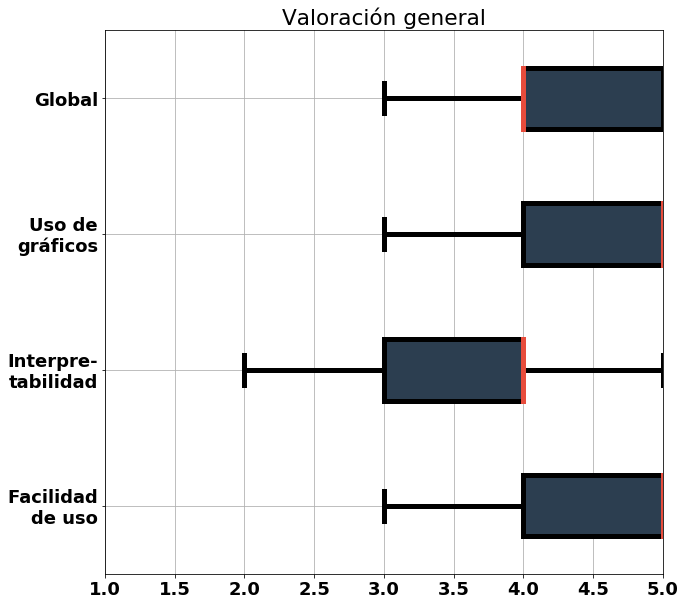

In [23]:
plot_comparation(web_responses[['Web_Ease','Web_Interpretation','Web_graphics','Web_global']], 
                 "Valoración general")
plt.savefig('./images/web_general.pdf', bbox_inches='tight')

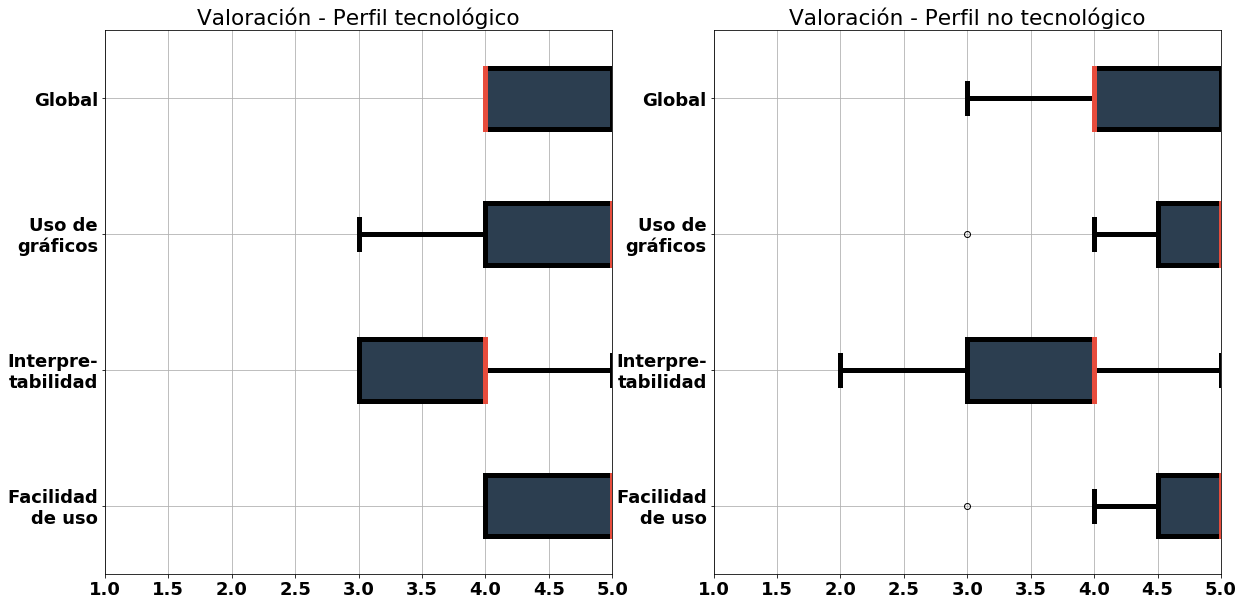

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

tecnologico = web_responses[web_responses.Career=='Tecnología']
no_tecnologico = web_responses[web_responses.Career!='Tecnología']

plot_comparation(tecnologico[['Web_Ease','Web_Interpretation','Web_graphics','Web_global']], 
                 "Valoración - Perfil tecnológico", ax=axs[0])
plot_comparation(no_tecnologico[['Web_Ease','Web_Interpretation','Web_graphics','Web_global']], 
                 "Valoración - Perfil no tecnológico", ax=axs[1])

plt.savefig('./images/web_comparation.pdf', bbox_inches='tight')

### Proporciones

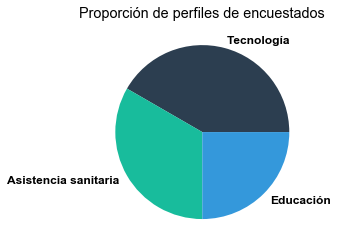

In [51]:
counter = web_responses.Career.value_counts(normalize=True)
plt.pie(counter, labels=counter.index, colors=['#2C3E50', '#18BC9C', '#3498DB'])
plt.title("Proporción de perfiles de encuestados")
plt.savefig('./images/web_proportion.pdf', bbox_inches='tight')

In [52]:
web_responses.Career.value_counts(normalize=True)

Tecnología              0.416667
Asistencia sanitaria    0.333333
Educación               0.250000
Name: Career, dtype: float64

## Análisis del movil

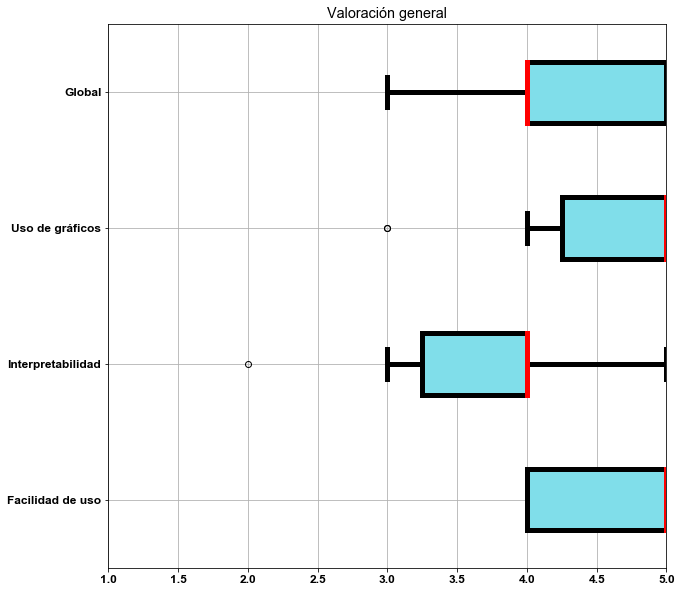

In [53]:
colores = ["#80DEEA", "#41f48f", "#00838F", "#c130ff" ]
plot_comparation(mobile_responses[['Mobile_Ease','Mobile_Interpretation','Mobile_graphics','Mobile_global']], 
                 "Valoración general",
                 colors=colores, median='red')
plt.savefig('./images/mobile_general.pdf', bbox_inches='tight')

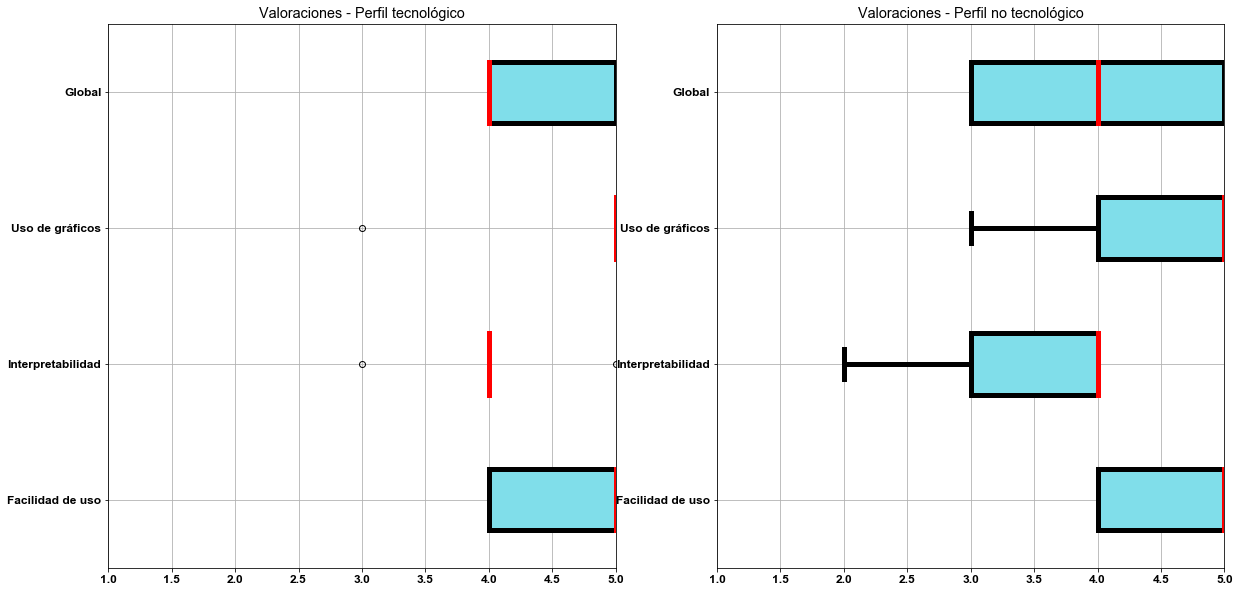

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

tecnologico = mobile_responses[mobile_responses.Career=='Tecnología']
no_tecnologico = mobile_responses[mobile_responses.Career!='Tecnología']

plot_comparation(tecnologico[['Mobile_Ease','Mobile_Interpretation','Mobile_graphics','Mobile_global']], 
                 "Valoraciones - Perfil tecnológico", ax=axs[0], colors=colores, median='red')
plot_comparation(no_tecnologico[['Mobile_Ease','Mobile_Interpretation','Mobile_graphics','Mobile_global']], 
                 "Valoraciones - Perfil no tecnológico", ax=axs[1], colors=colores, median='red')
plt.savefig('./images/mobile_comparation.pdf', bbox_inches='tight')

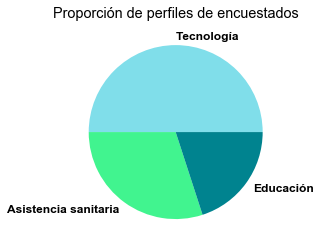

In [55]:
counter = mobile_responses.Career.value_counts(normalize=True)
plt.pie(counter, labels=counter.index, colors=colores[:3])
plt.title("Proporción de perfiles de encuestados")
plt.savefig('./images/mobile_proportion.pdf', bbox_inches='tight')